In [114]:
import numpy as np  
import matplotlib.pyplot as plt
import cv2

In [115]:
IMG_PATH = '../../images'

(512, 512, 3)


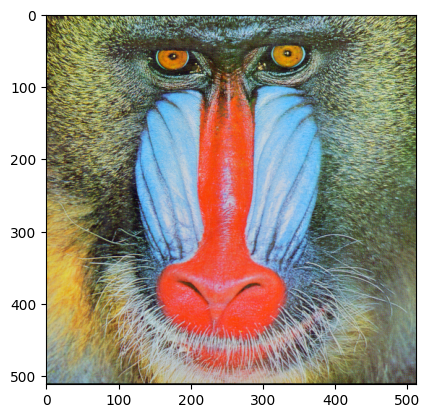

In [116]:
img = cv2.imread(f"{IMG_PATH}/baboon.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

<h3>FFT using OpenCv and NumPy</h3>

In [117]:
def fft_image(img):
    ft = np.fft.fft2(img)
    ft_shift = np.fft.fftshift(ft)
    magnitude_spectrum = np.log(np.abs(ft_shift))
    magnitude_spectrum_unshifted = np.log(np.abs(ft))   
    # Plotting the Spectrum
    plt.figure(figsize=(16,16))
 
    plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122),plt.imshow(magnitude_spectrum_unshifted, cmap = 'gray')
    plt.title('Magnitude Spectrum (unshifted)'), plt.xticks([]), plt.yticks([])


    plt.show()

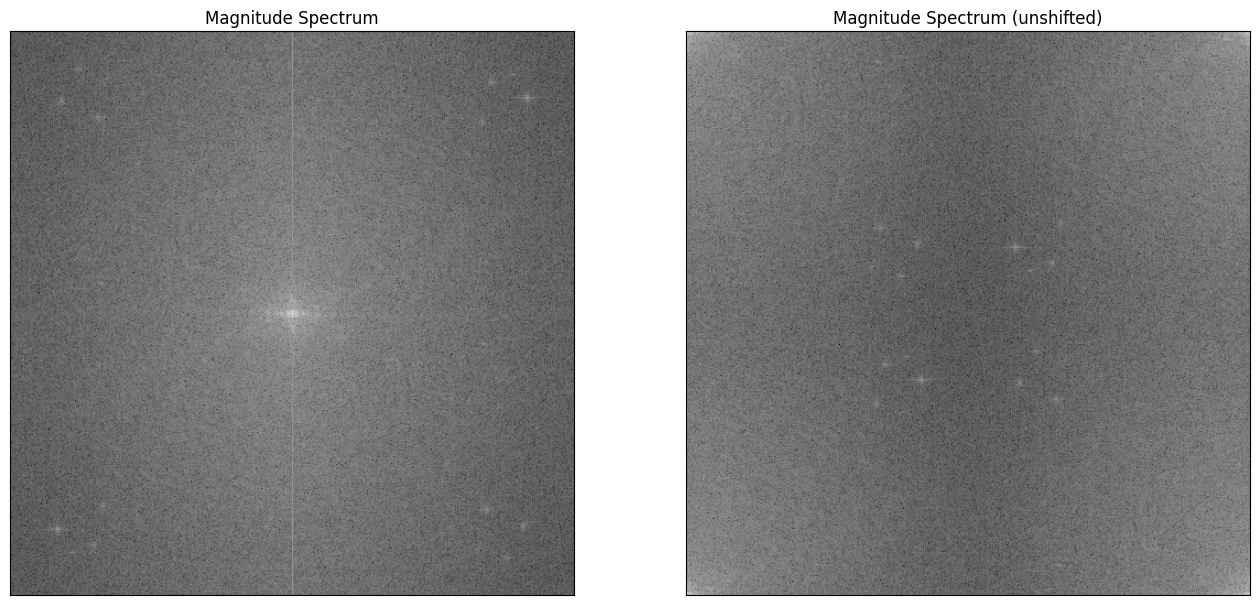

In [118]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fft_image(gray_image)

<h3>Filtro passa baixas<h3>

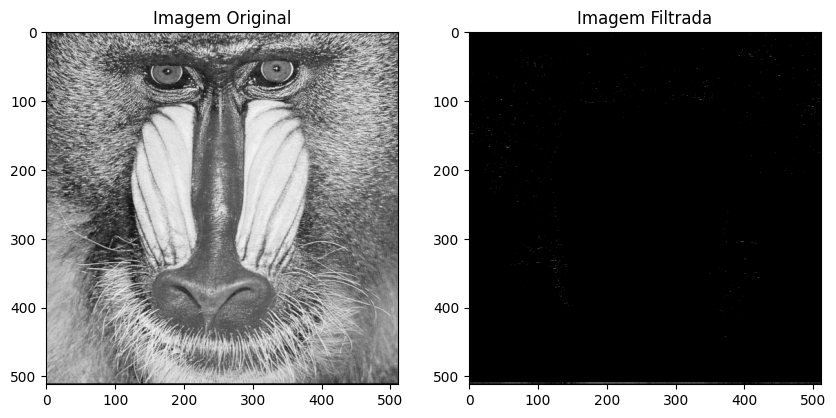

In [129]:
from scipy import signal

# Função para criar um filtro passa-baixas Butterworth
def butterworth_passa_baixas(cutoff, width, n):
    """
    Cria um filtro passa-baixas Butterworth.

    cutoff: frequência de corte do filtro
    width: largura da banda de transição
    n: ordem do filtro
    """
    b, a = signal.butter(n, cutoff, btype='low', analog=False, output='ba', fs=1.0)
    return b, a

# Função para aplicar o filtro em uma imagem
def filtrar_imagem(imagem, cutoff, width, n):
    # Obtendo os coeficientes do filtro
    b, a = butterworth_passa_baixas(cutoff, width, n)
    
    # Filtrando a imagem
    imagem_filtrada = cv2.filter2D(imagem, -1, b/a)
    return imagem_filtrada

# Carregando a imagem
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Definindo parâmetros do filtro
cutoff_frequency = 0.15  # Frequência de corte (0 a 0.5)
transition_width = 0.1  # Largura da banda de transição
order = 3               # Ordem do filtro

# Aplicando o filtro na imagem
imagem_filtrada = filtrar_imagem(imagem, cutoff_frequency, transition_width, order)

# Exibindo a imagem original e a imagem filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada')

plt.show()

<h3>Filtro Passa-Altas</h3>

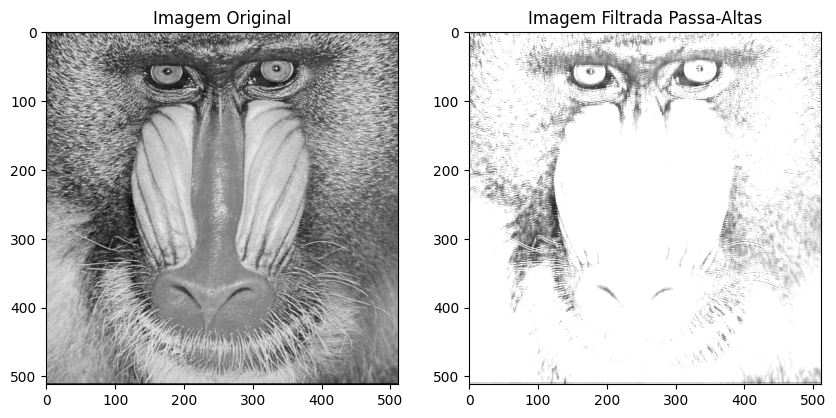

In [120]:
# Função para criar um filtro passa-altas a partir de um passa-baixas
def passa_altas(b, a):
    """
    Cria um filtro passa-altas a partir dos coeficientes de um filtro passa-baixas.

    b: coeficientes do filtro passa-baixas (numerador)
    a: coeficientes do filtro passa-baixas (denominador)
    """
    # Invertendo os coeficientes
    b_passa_altas = -b
    b_passa_altas[0] += 1
    
    return b_passa_altas, a

# Função para aplicar o filtro passa-altas em uma imagem
def filtrar_imagem_passa_altas(imagem, cutoff, width, n):
    # Obtendo os coeficientes do filtro passa-baixas
    b, a = signal.butter(n, cutoff, btype='low', analog=False, output='ba', fs=1.0)
    
    # Criando o filtro passa-altas
    b_passa_altas, a_passa_altas = passa_altas(b, a)
    
    # Filtrando a imagem
    imagem_filtrada = cv2.filter2D(imagem, -1, b_passa_altas/a_passa_altas)
    return imagem_filtrada

# Carregando a imagem
imagem = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Definindo parâmetros do filtro
cutoff_frequency = 0.2 # Frequência de corte (0 a 0.5)
transition_width = 0.1  # Largura da banda de transição
order = 3               # Ordem do filtro

# Aplicando o filtro passa-altas na imagem
imagem_passa_altas = filtrar_imagem_passa_altas(imagem, cutoff_frequency, transition_width, order)

# Exibindo a imagem original e a imagem filtrada passa-altas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(imagem_passa_altas, cmap='gray')
plt.title('Imagem Filtrada Passa-Altas')

plt.show()